# ATV 02 Camadas Escondidas

In [11]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo
import time

RANDOM_STATE = 42

## Importacao dos Dados

Código abaixo provido pelo UCI ML Repo, vou pular a análise exploratória, tratamento e normalização pois não é o objetivo aqui

In [12]:
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
# print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [13]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [14]:
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [31]:
split_index = int(len(X) * 0.7)

# 70/30 split using slicing
train_X, train_y = X[:split_index], y[:split_index]
test_X, test_y = X[split_index:], y[split_index:]

len(train_X), len(train_y), len(test_X), len(test_y)

(3220, 3220, 1381, 1381)

In [32]:
all_times = []
all_accs = []

# Experimento em Loop

In [33]:
for i in range(1, 11):
    n_tuple = tuple()
    for _ in range(i):
        n_tuple = n_tuple + (100,)

    n_layer_mlp = MLPClassifier(random_state=RANDOM_STATE, hidden_layer_sizes=n_tuple)

    start = time.time()
    n_layer_mlp.fit(train_X, train_y)
    end = time.time()
    all_times.append(end - start)

    n_layer_pred = n_layer_mlp.predict(test_X)
    acc = accuracy_score(test_y, n_layer_pred)
    all_accs.append(acc)    

print(all_times)
print(all_accs)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed w

[0.6197171211242676, 0.6111581325531006, 1.2535088062286377, 1.2525529861450195, 1.8965137004852295, 2.664102077484131, 2.3508198261260986, 2.102019786834717, 6.628779888153076, 6.678919792175293]
[0.8819695872556119, 0.7443881245474294, 0.7856625633598842, 0.7986965966690803, 0.8030412744388125, 0.8189717595944968, 0.7530774800868936, 0.779869659666908, 0.7487328023171614, 0.8015930485155685]


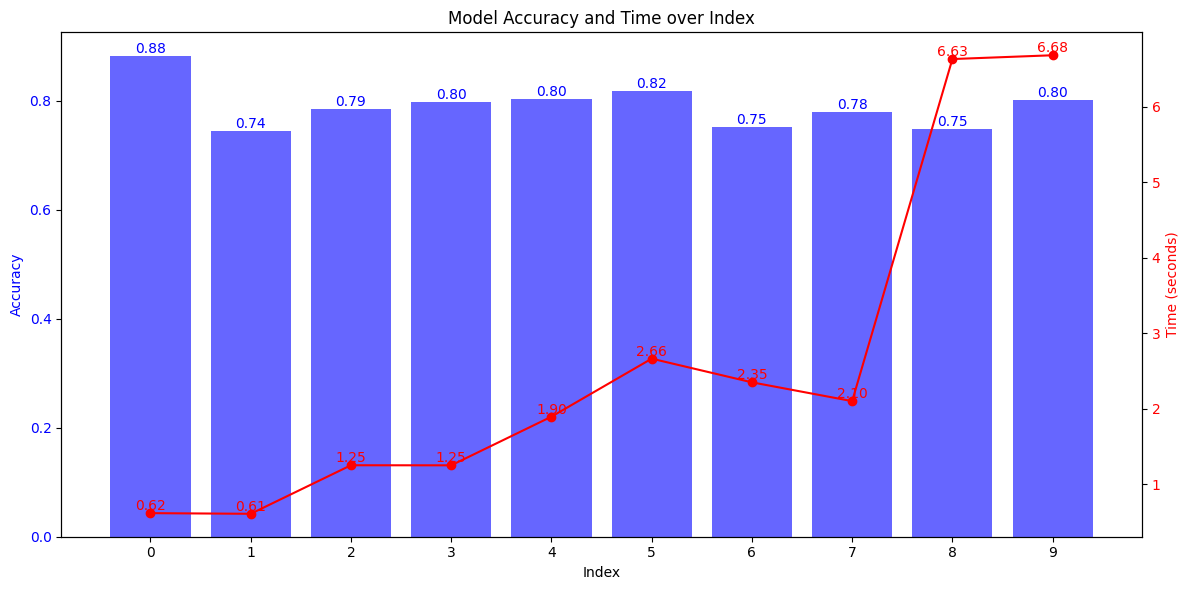

In [36]:
indices = range(len(all_accs))  # Indices corresponding to each model run

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for accuracy
bars = ax1.bar(indices, all_accs, color='blue', alpha=0.6, label='Accuracy')
ax1.set_xlabel('Index')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Annotate the bars with accuracy values
for bar, accuracy in zip(bars, all_accs):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{accuracy:.2f}', ha='center', va='bottom', color='blue')

# Line plot for time on the same plot but different y-axis
ax2 = ax1.twinx()  # Instantiate a second y-axis
line = ax2.plot(indices, all_times, color='red', marker='o', linestyle='-', label='Time')
ax2.set_ylabel('Time (seconds)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Annotate the line with time values
for i, time in enumerate(all_times):
    ax2.text(i, time, f'{time:.2f}', ha='center', va='bottom', color='red')

# Set x-axis ticks to show all indices
ax1.set_xticks(indices)
ax1.set_xticklabels(indices)

# Add a title
plt.title('Model Accuracy and Time over Index')

# Show the plot
fig.tight_layout()  # Adjust layout to accommodate both y-axes
plt.show()

Observa-se que para essa base de dados, com esse holdout, aumentar o número de camadas escondidas não se correlaciona com uma melhor acurácia, apenas apresenta uma tendência de aumento no tempo de treino. Na verdade, a melhor acurácia é obtida com uma única camada escondida, que também apresenta o menor tempo de treinamento. Para uma base de dados mais complexa, com mais registros, pode ser que mais camadas faça sentido, mas isso requer experimentação.